# ROCCC Analysis

{'missing_values': id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_wo

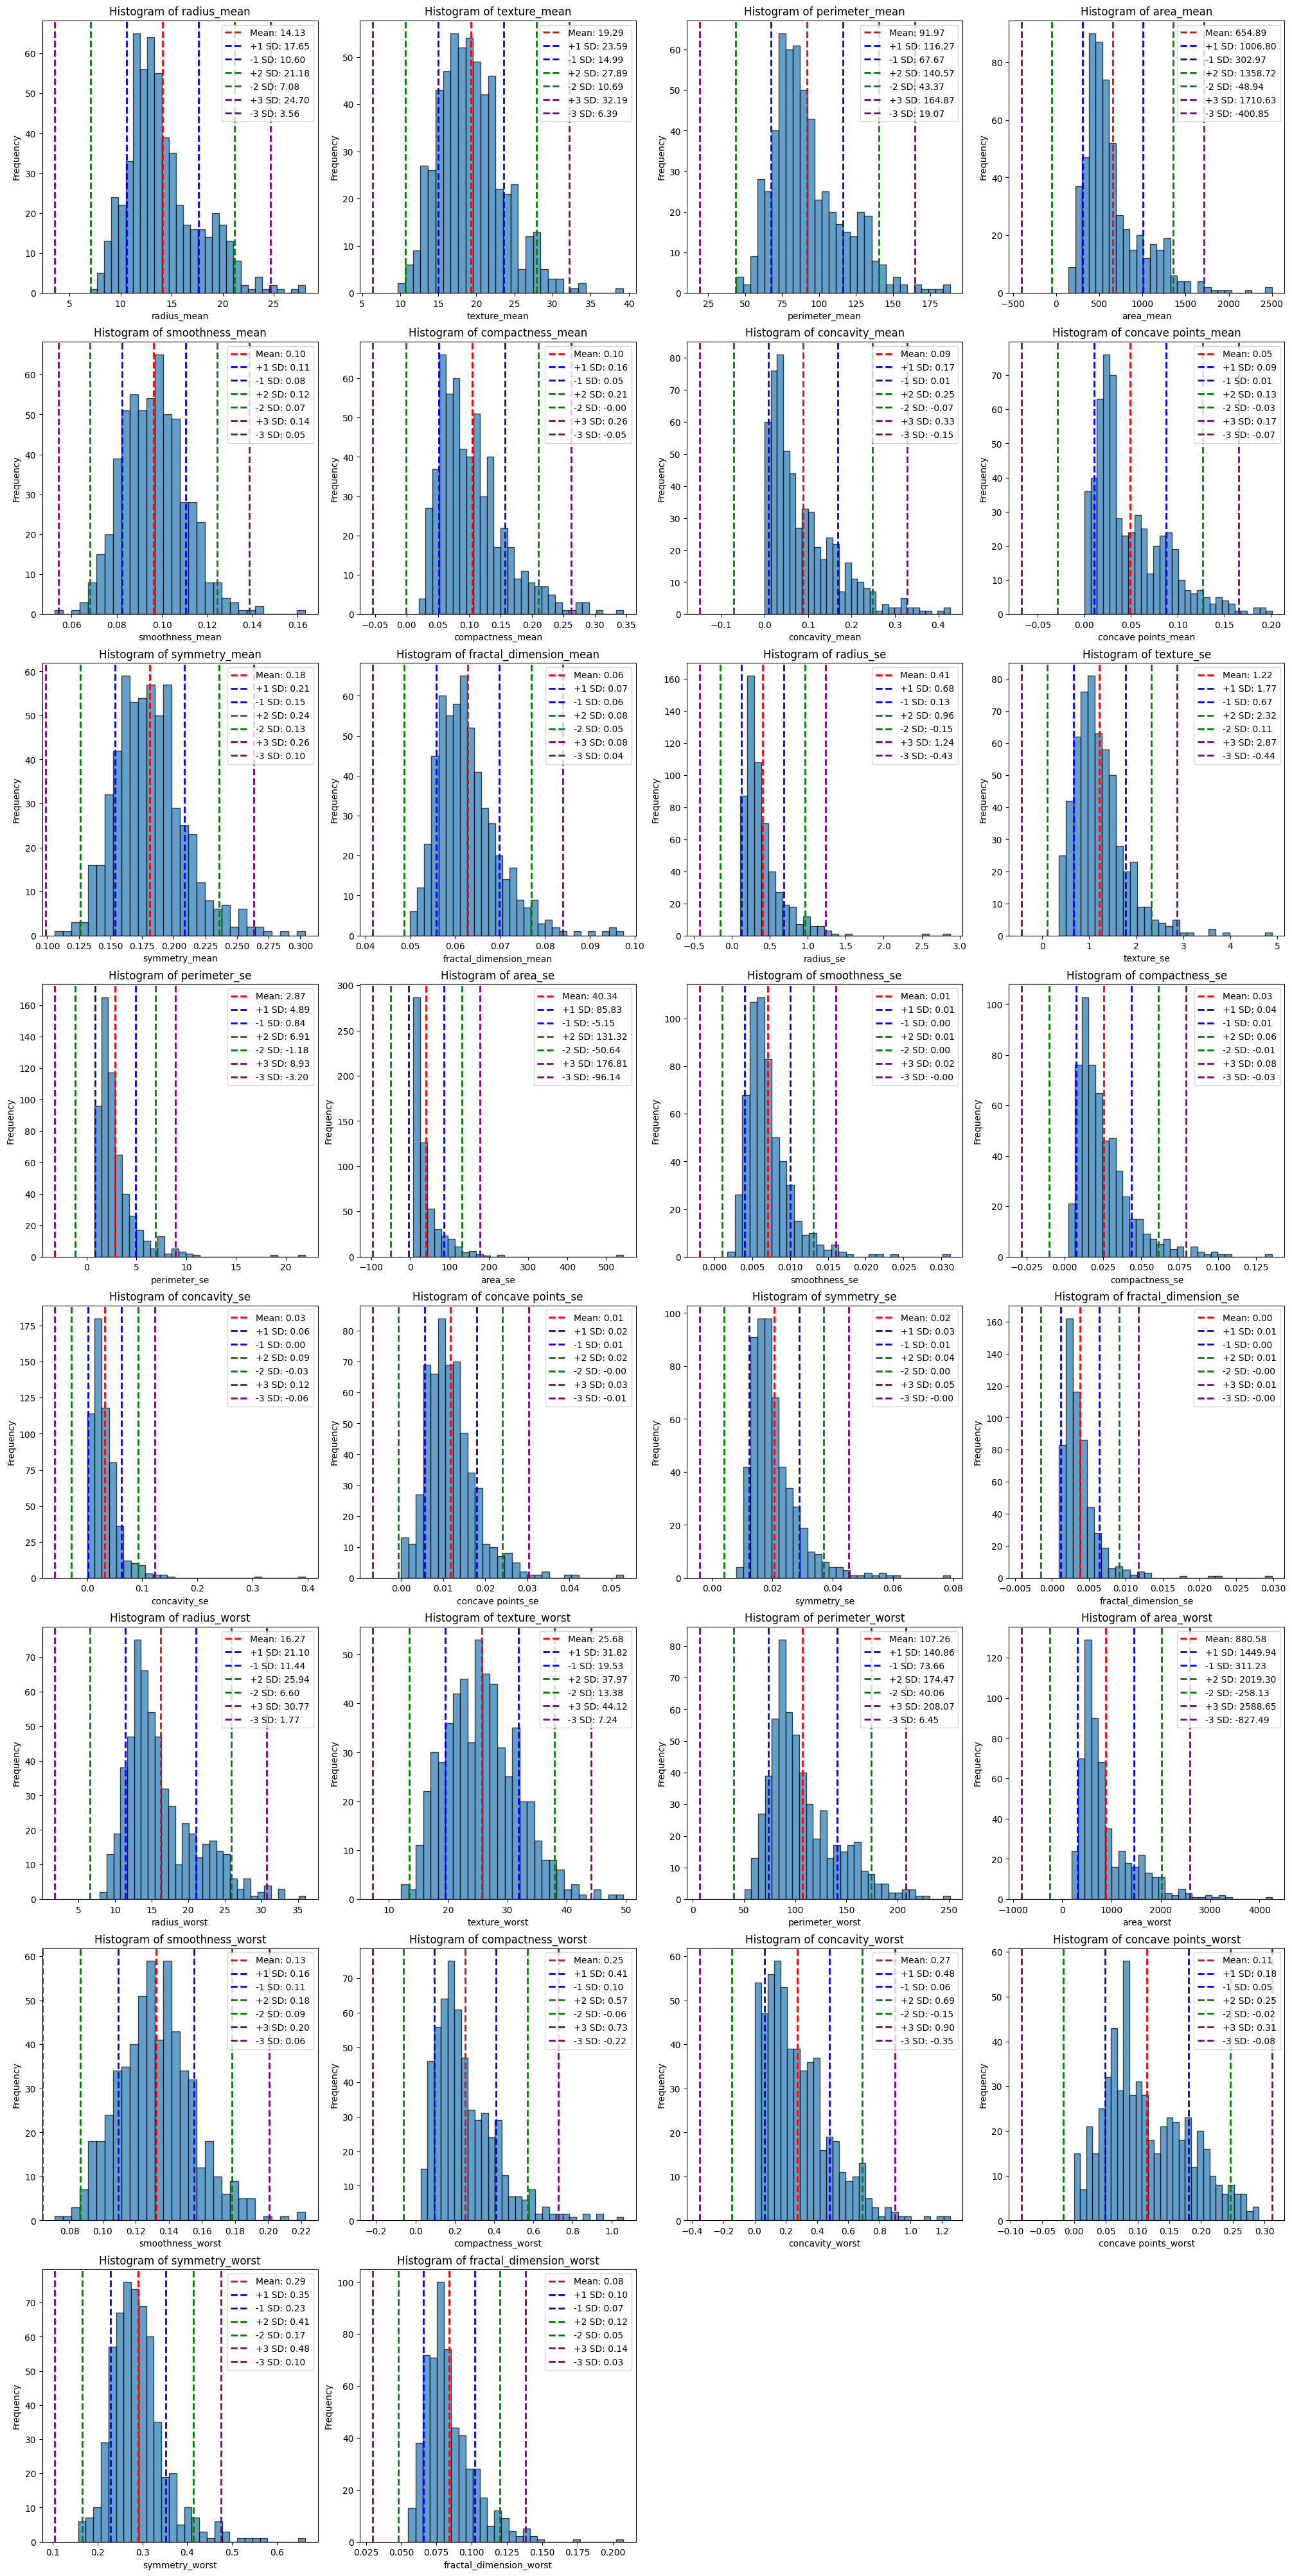

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv("data.csv")


missing_values = data.isna().sum()
duplicate_values = data.duplicated().sum()
reliability = {"missing_values": missing_values, "duplicate_values": duplicate_values}
print(reliability)


features = list(data.columns)[2:32]

# Set up subplots
num_features = len(features)
cols = 4  # Number of columns in the grid
rows = (num_features + cols - 1) // cols

fig, axes = plt.subplots(rows, cols, figsize=(20, rows * 5), constrained_layout=True)

for idx, feature in enumerate(features):
    row, col = divmod(idx, cols)
    ax = axes[row, col]

    mean = data[feature].mean()
    std_dev = data[feature].std()

    ax.hist(data[feature], bins=30, edgecolor='black', alpha=0.7)

    ax.axvline(mean, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean:.2f}')
    ax.axvline(mean + std_dev, color='blue', linestyle='dashed', linewidth=2, label=f'+1 SD: {mean + std_dev:.2f}')
    ax.axvline(mean - std_dev, color='blue', linestyle='dashed', linewidth=2, label=f'-1 SD: {mean - std_dev:.2f}')
    ax.axvline(mean + 2 * std_dev, color='green', linestyle='dashed', linewidth=2, label=f'+2 SD: {mean + 2 * std_dev:.2f}')
    ax.axvline(mean - 2 * std_dev, color='green', linestyle='dashed', linewidth=2, label=f'-2 SD: {mean - 2 * std_dev:.2f}')
    ax.axvline(mean + 3 * std_dev, color='purple', linestyle='dashed', linewidth=2, label=f'+3 SD: {mean + 3 * std_dev:.2f}')
    ax.axvline(mean - 3 * std_dev, color='purple', linestyle='dashed', linewidth=2, label=f'-3 SD: {mean - 3 * std_dev:.2f}')

    ax.set_title(f'Histogram of {feature}')
    ax.set_xlabel(feature)
    ax.set_ylabel('Frequency')
    ax.legend()

for idx in range(num_features, rows * cols):
    fig.delaxes(axes.flatten()[idx])

plt.show()


## Inference


*   All the plots have been analysed based on the means and the standard deviations the data distribution is very reliable and not skewed.
*   There were few outliers identified but that in modelling can help identify very intersting patterns.
* There fore this data is reliable
* The data has passed our ROCCC criteria.

# Exploratory Data Analysis

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

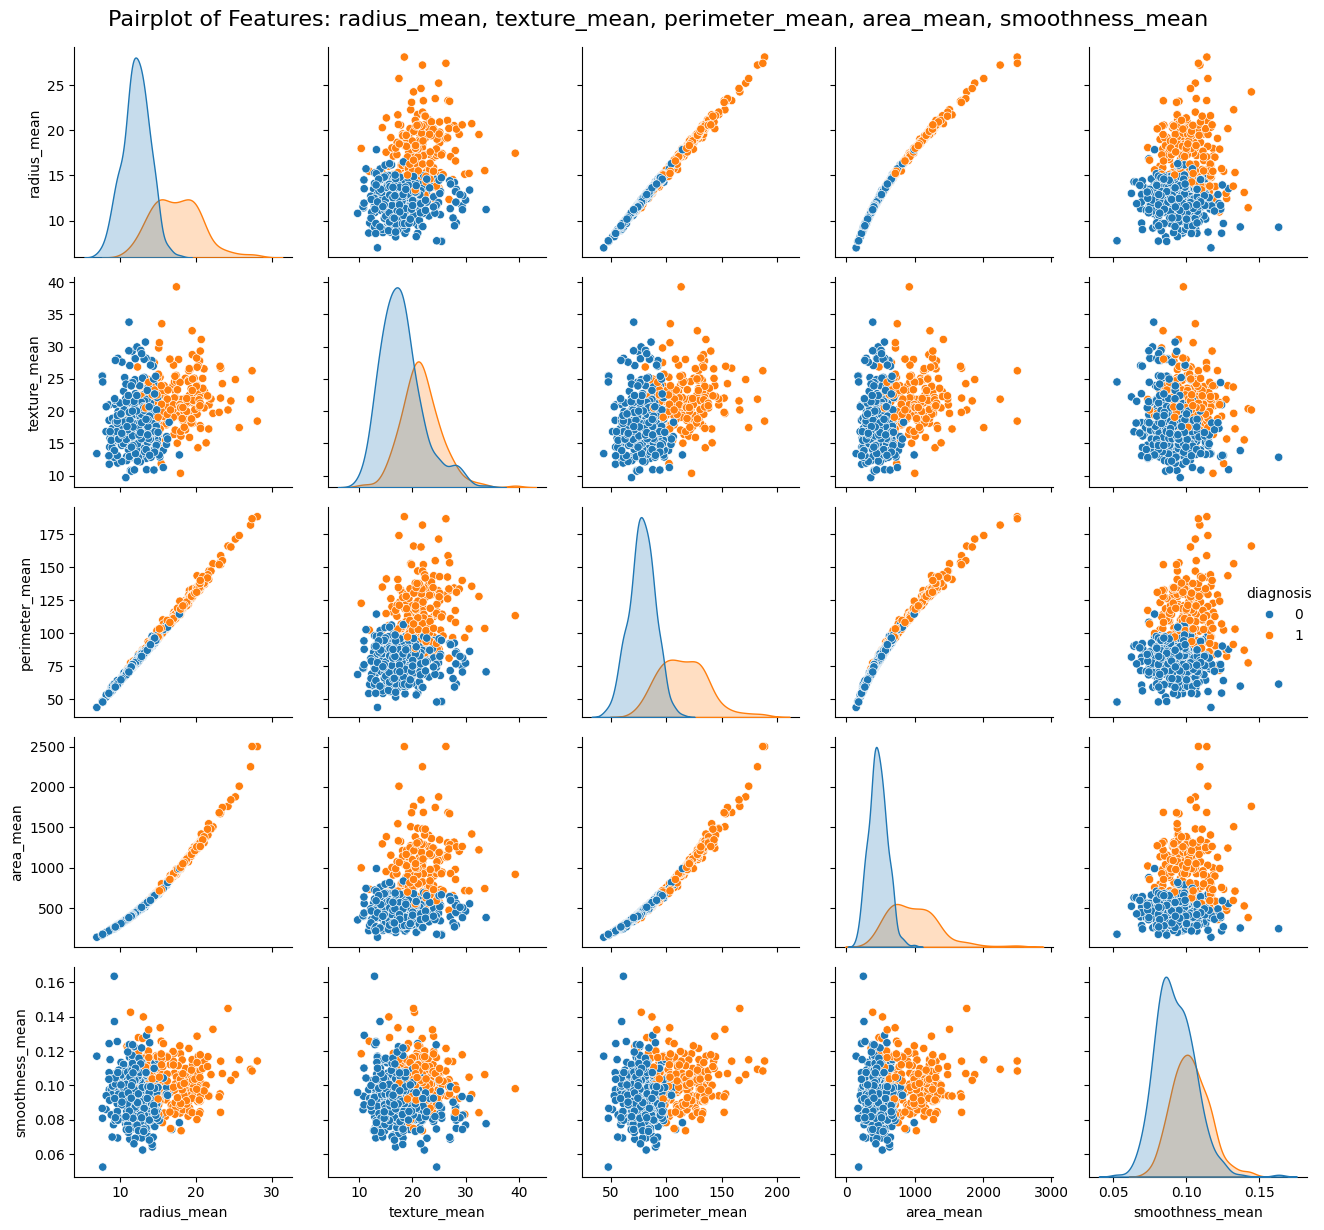

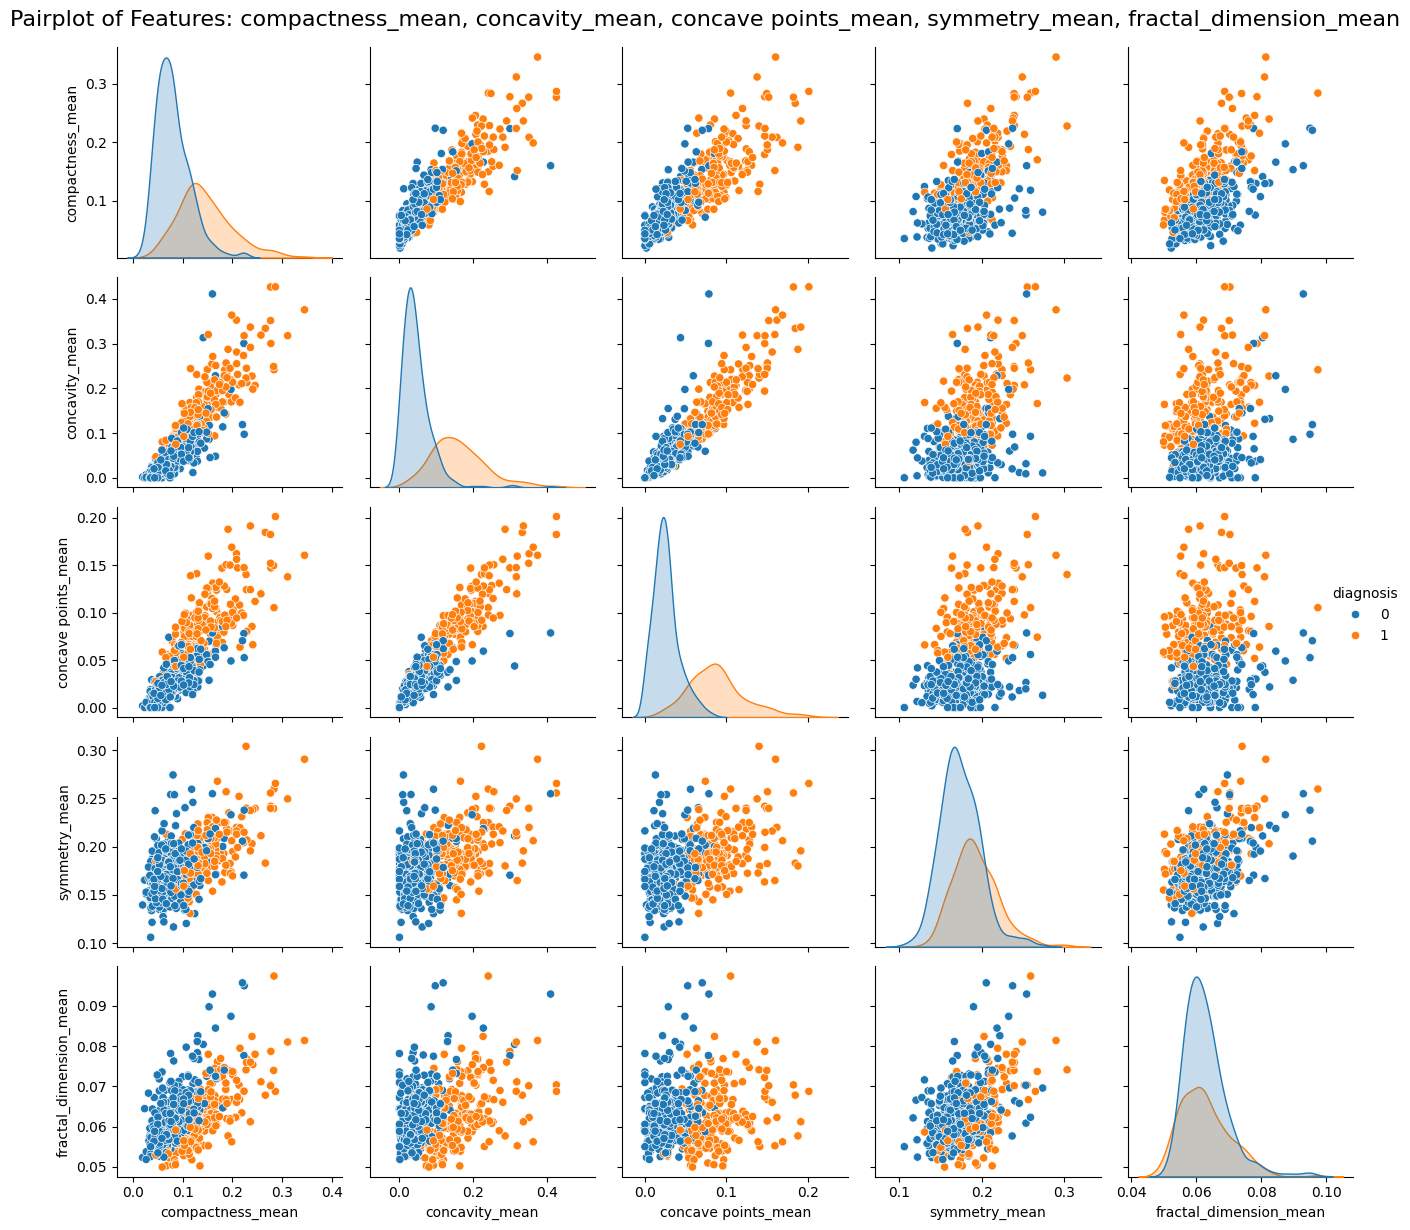

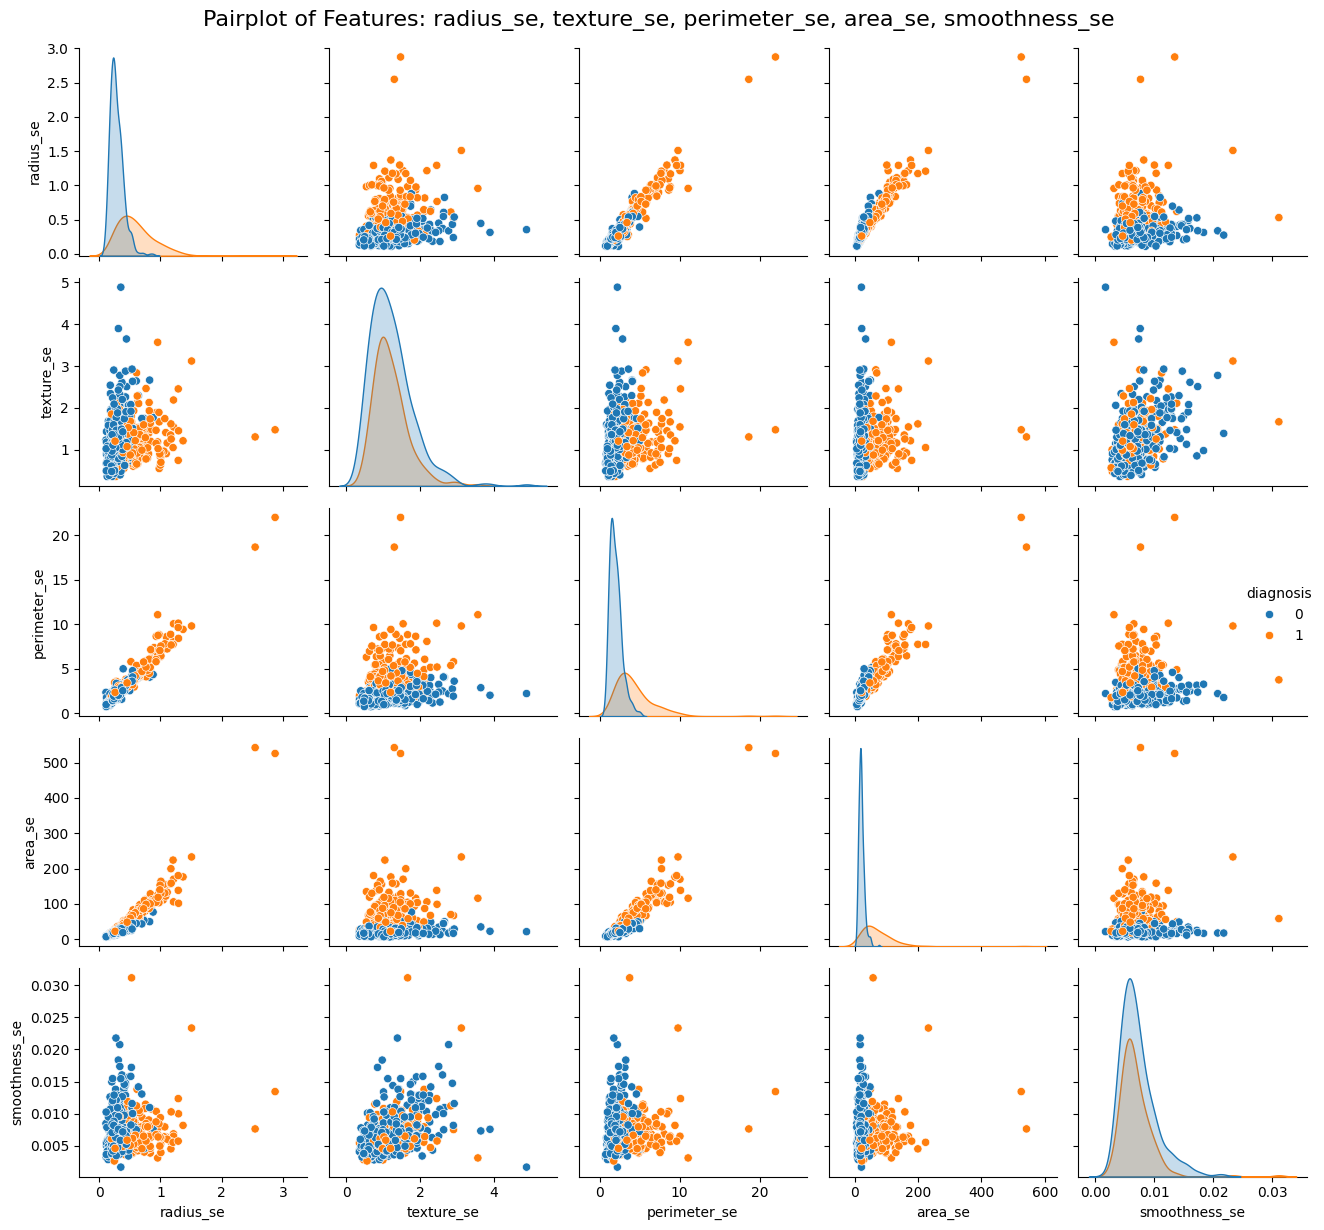

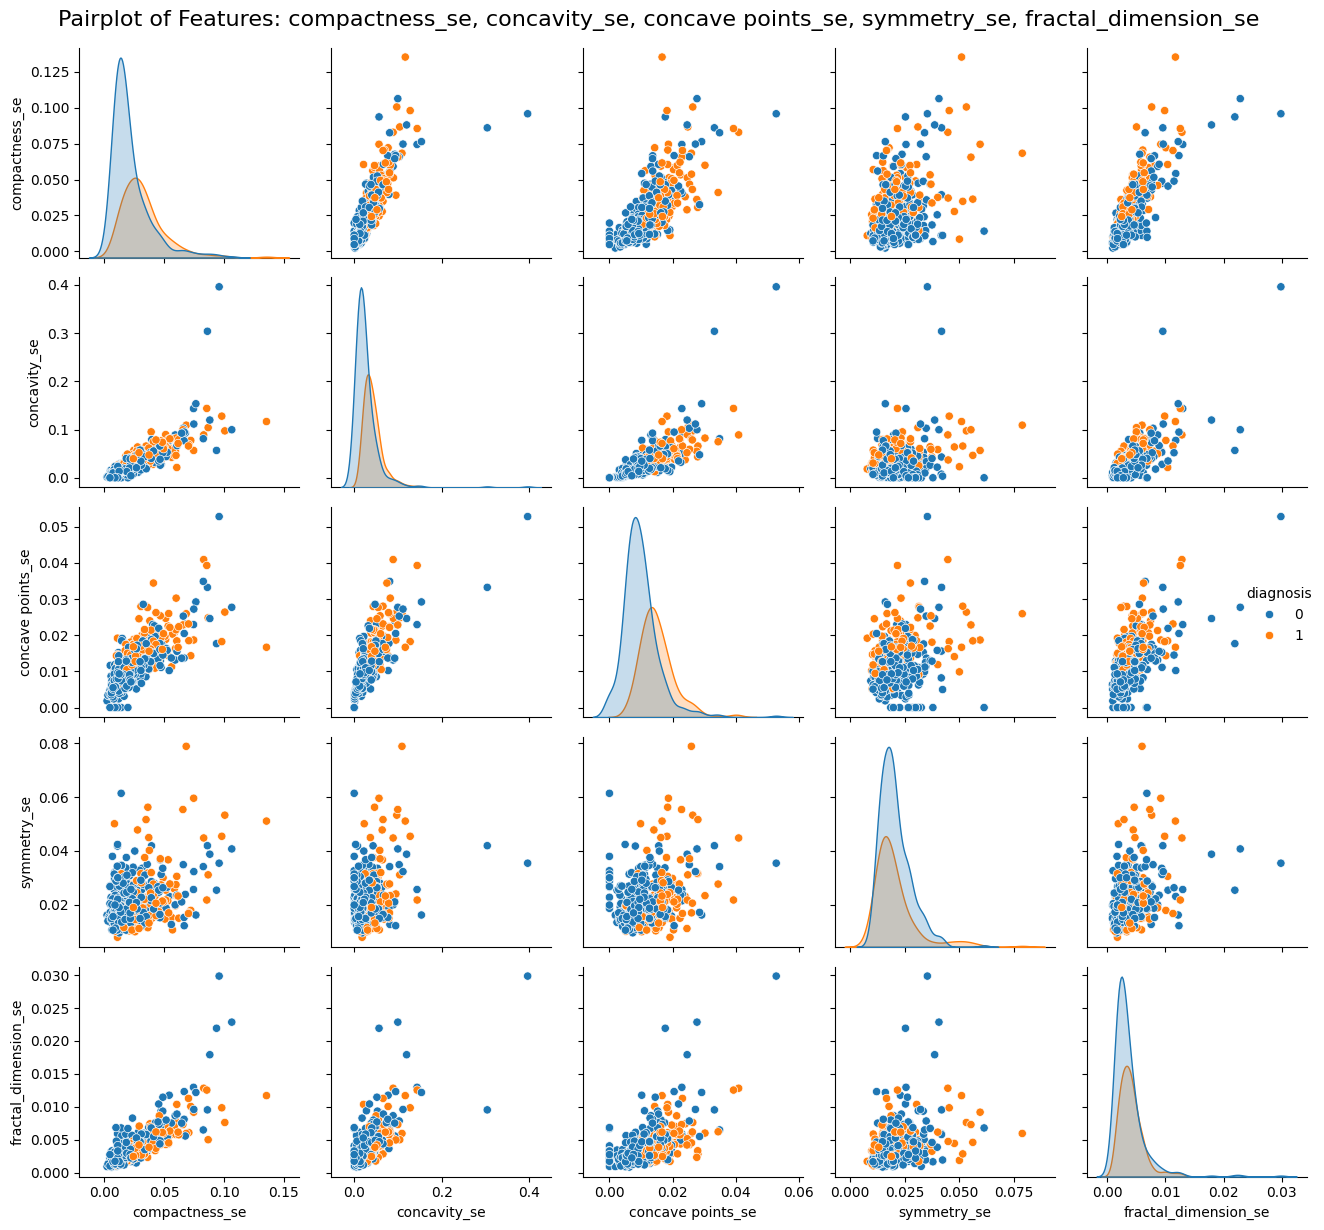

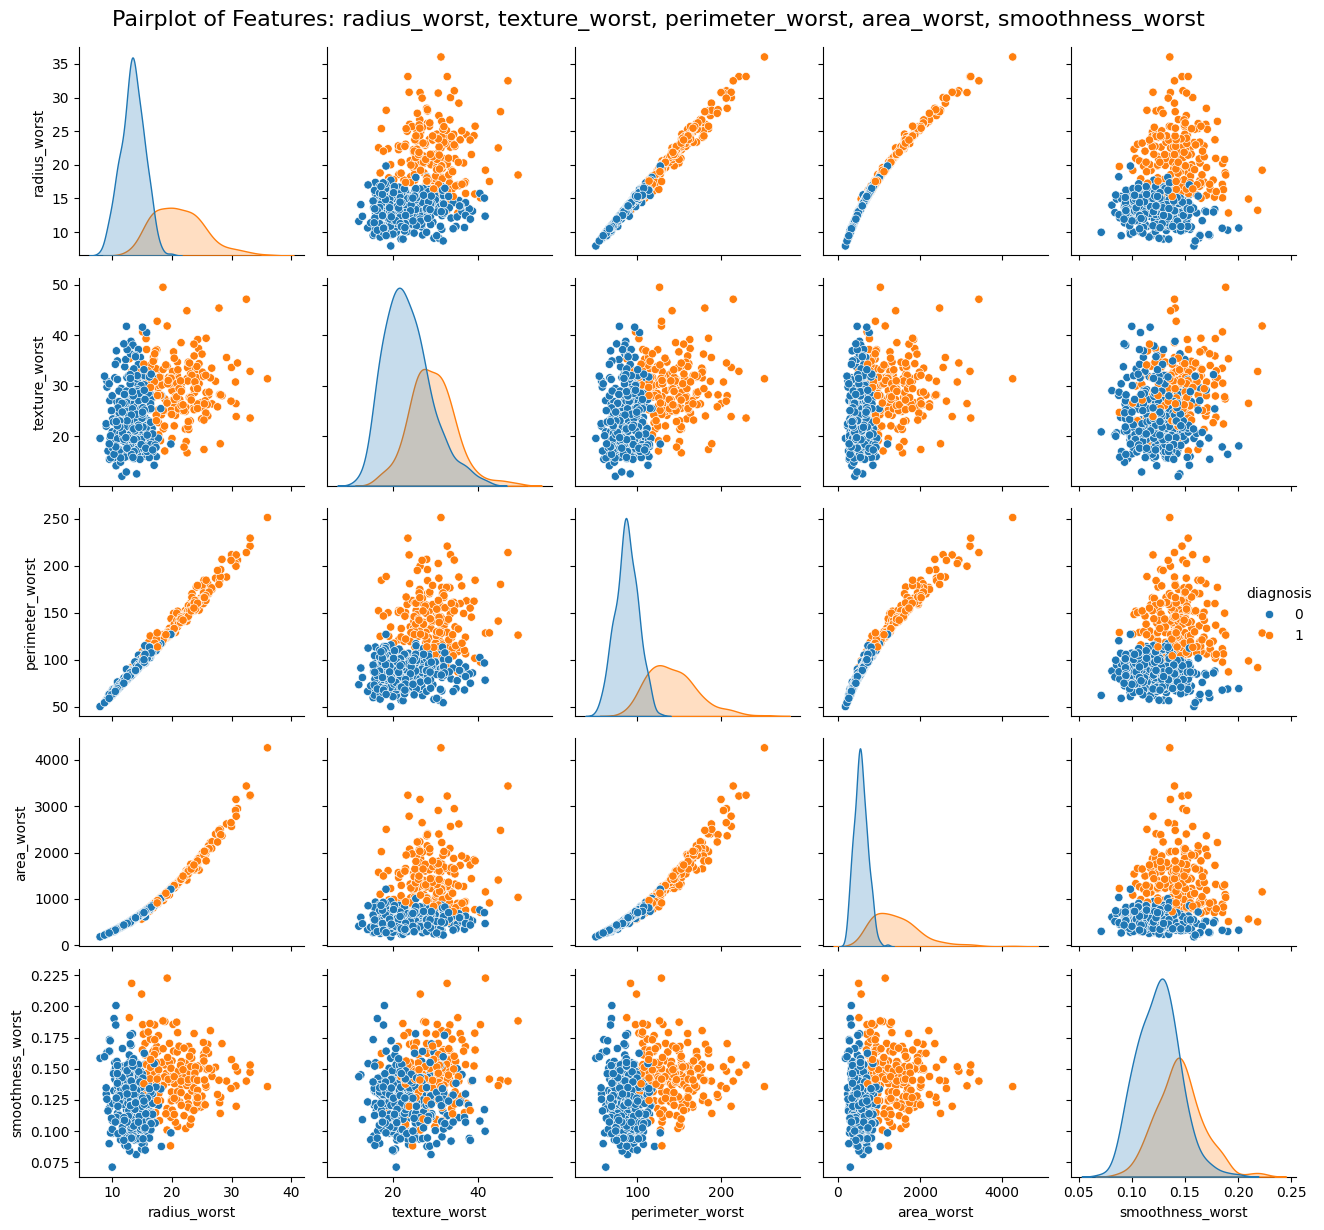

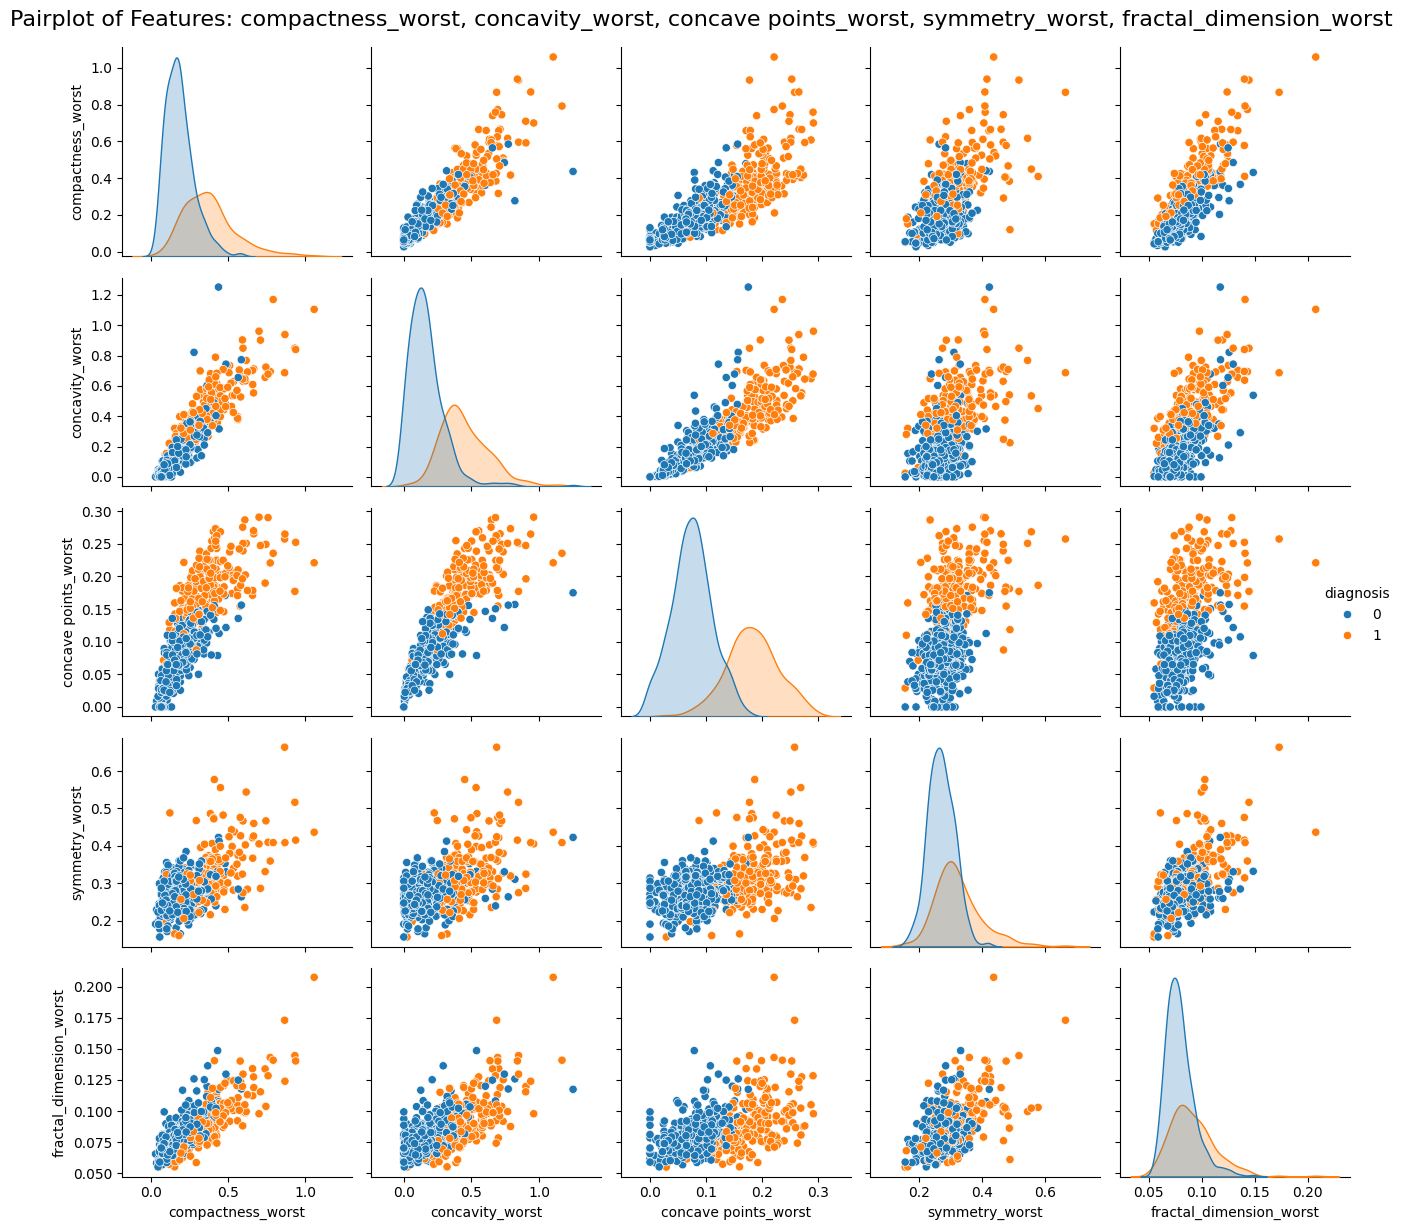

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

################################################################### Handling the outliers #############################################################################################
data_with_outliers = pd.read_csv("data.csv")
print(data_with_outliers.dtypes)
features = data_with_outliers.select_dtypes(include=float)

mean = features.mean()
std_dev = features.std()

outlier_mask = (data_with_outliers.select_dtypes(include=["Float64"]) < (mean - 3 * std_dev)) | (data_with_outliers.select_dtypes(include=["Float64"]) > (mean + 3 * std_dev))
outliers = data_with_outliers[outlier_mask.any(axis=1)]
data_without_outliers = data_with_outliers[~outlier_mask.any(axis=1)]

print(data_with_outliers.head(5))
print(data_without_outliers.head(5))

# We are gonna Explore the modelling for both of these data.

#################################################################### Exploratory Data Analysis ######################################################################################

data_with_outliers['diagnosis'] = data_with_outliers['diagnosis'].map({'M': 1, 'B': 0})
data_with_outliers = data_with_outliers.drop(columns=['id', 'Unnamed: 32'], errors='ignore')

X_with_target = data_with_outliers.copy()
X = X_with_target.drop(columns=['diagnosis'])
y = X_with_target['diagnosis']

X = X.reset_index(drop=True)
y = y.reset_index(drop=True)

feature_columns = [
    'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean',
    'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
    'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
    'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se',
    'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst',
    'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst'
]

feature_subsets = [feature_columns[i:i + 5] for i in range(0, len(feature_columns), 5)]

for i, subset in enumerate(feature_subsets):
    sns.pairplot(X_with_target[subset + ['diagnosis']], hue='diagnosis', height=2.5)

    plt.suptitle(f'Pairplot of Features: {", ".join(subset)}', fontsize=16)
    plt.tight_layout()
    plt.subplots_adjust(top=0.95)
    plt.show()


# Inference


*   We have handled the outliers, found no missing data
*   Identified the features that are autocorrelated to other features



# Feature Exploration and Engineering

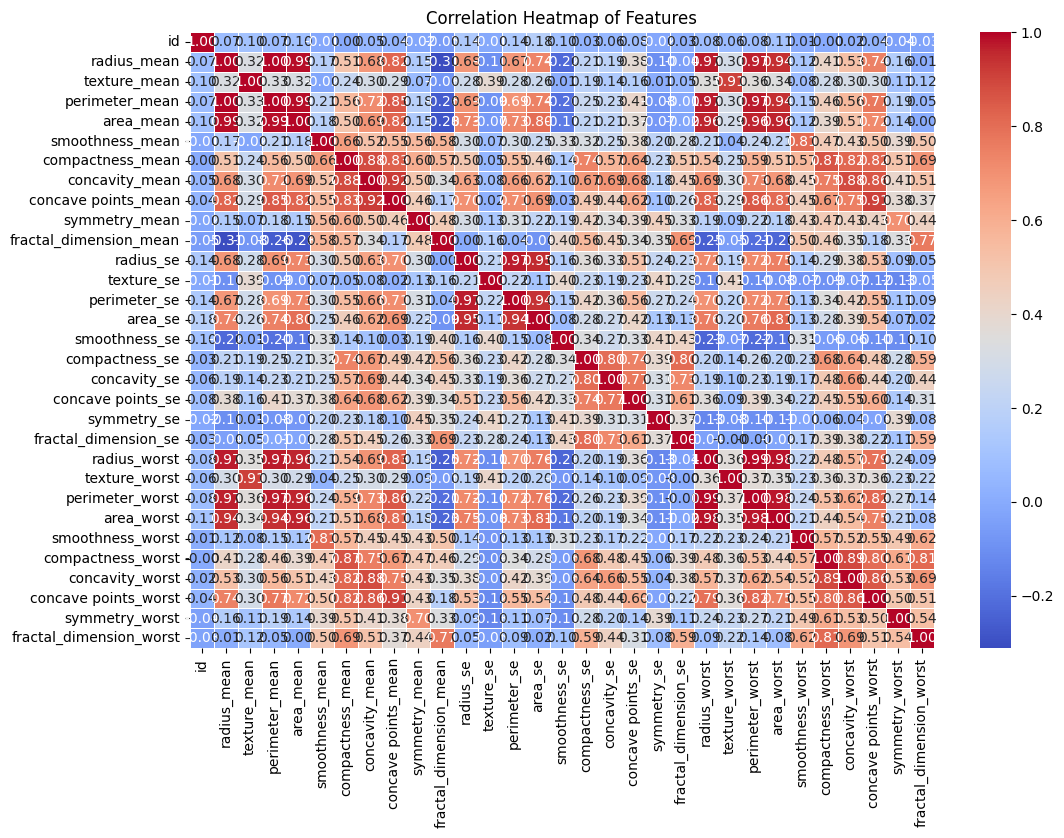

Highly correlated features to drop: {'perimeter_worst', 'radius_worst', 'area_mean', 'concave points_mean', 'area_se', 'perimeter_mean', 'perimeter_se', 'texture_worst', 'concave points_worst', 'area_worst'}
Selected features from RFE: Index(['perimeter_mean', 'area_mean', 'concavity_mean', 'concave points_mean',
       'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst',
       'concavity_worst', 'concave points_worst'],
      dtype='object')
Selected features from Lasso regression: id    1.395764e-10
dtype: float64
Top 10 features by importance from RandomForest:
perimeter_worst         0.149230
area_worst              0.123890
concave points_mean     0.120721
radius_worst            0.117015
concave points_worst    0.101117
area_mean               0.048349
concavity_mean          0.044869
area_se                 0.042733
concavity_worst         0.028308
perimeter_mean          0.027772
dtype: float64

Features to drop based on correlation matrix:
{'perimeter_worst', 'ra

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LassoCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

data = pd.read_csv("data.csv")

X = data.drop(columns=['diagnosis'])
y = data['diagnosis']
X = X.drop(columns=['Unnamed: 32'])

imputer = SimpleImputer(strategy='mean')
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

####################################################################################################
# 1. Correlation Matrix (Filter Method)
####################################################################################################
correlation_matrix = X.corr()

# Plot the correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Features')
plt.show()

# Identifying pairs of highly correlated features (correlation > 0.9)
highly_correlated_features = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.9:
            colname = correlation_matrix.columns[i]
            highly_correlated_features.add(colname)

print(f"Highly correlated features to drop: {highly_correlated_features}")

####################################################################################################
# 2. Recursive Feature Elimination (RFE) - Wrapper Method
####################################################################################################

rf = RandomForestClassifier()
rfe = RFE(estimator=rf, n_features_to_select=10)
X_rfe = rfe.fit_transform(X, y_encoded)
selected_features_rfe = X.columns[rfe.support_]
print("Selected features from RFE:", selected_features_rfe)

####################################################################################################
# 3. Lasso Regression (Embedded Method)
####################################################################################################

lasso = LassoCV(cv=5)
lasso.fit(X, y_encoded)
lasso_coefficients = pd.Series(lasso.coef_, index=X.columns)
selected_lasso_features = lasso_coefficients[lasso_coefficients != 0]
print("Selected features from Lasso regression:", selected_lasso_features)

####################################################################################################
# 4. Feature Importance from Random Forest (Embedded Method)
####################################################################################################
rf.fit(X, y_encoded)
feature_importances = pd.Series(rf.feature_importances_, index=X.columns)
sorted_feature_importances = feature_importances.sort_values(ascending=False)
print("Top 10 features by importance from RandomForest:")
print(sorted_feature_importances.head(10))

####################################################################################################
# Summary of Feature Selection Methods
####################################################################################################
print("\nFeatures to drop based on correlation matrix:")
print(highly_correlated_features)
print("\nSelected features from RFE method:")
print(selected_features_rfe)
print("\nSelected features from Lasso regression method:")
print(selected_lasso_features)
print("\nTop features from RandomForest importance:")
print(sorted_feature_importances.head(10))


# Inference

### RandomForest Feature Importances
Here are the top features based on the RandomForest feature importances:

- **perimeter_worst**: 0.149230
- **area_worst**: 0.123890
- **concave points_mean**: 0.120721
- **radius_worst**: 0.117015
- **concave points_worst**: 0.101117
- **area_mean**: 0.048349
- **concavity_mean**: 0.044869
- **area_se**: 0.042733
- **concavity_worst**: 0.028308
- **perimeter_mean**: 0.027772

---

### Features to Drop Based on Correlation Matrix
Based on the correlation matrix, the following features are recommended for removal due to high correlation:

- perimeter_worst
- radius_worst
- area_mean
- concave points_mean
- area_se
- perimeter_mean
- perimeter_se
- texture_worst
- concave points_worst
- area_worst

---

### Selected Features from RFE Method
The features selected using the Recursive Feature Elimination (RFE) method are:

- perimeter_mean
- area_mean
- concavity_mean
- concave points_mean
- radius_worst
- texture_worst
- perimeter_worst
- area_worst
- concavity_worst
- concave points_worst


# Model Selection, Evaluation, Building and Comparission


Evaluating Random Forest with StandardScaler scaling with PCA

Evaluating Random Forest with StandardScaler scaling without PCA

Evaluating Random Forest with MinMaxScaler scaling with PCA

Evaluating Random Forest with MinMaxScaler scaling without PCA

Evaluating Random Forest with No Scaling scaling with PCA

Evaluating Random Forest with No Scaling scaling without PCA

Evaluating Logistic Regression with StandardScaler scaling with PCA

Evaluating Logistic Regression with StandardScaler scaling without PCA

Evaluating Logistic Regression with MinMaxScaler scaling with PCA

Evaluating Logistic Regression with MinMaxScaler scaling without PCA

Evaluating Logistic Regression with No Scaling scaling with PCA

Evaluating Logistic Regression with No Scaling scaling without PCA

Evaluating XGBoost with StandardScaler scaling with PCA

Evaluating XGBoost with StandardScaler scaling without PCA

Evaluating XGBoost with MinMaxScaler scaling with PCA

Evaluating XGBoost with MinMaxScaler scal

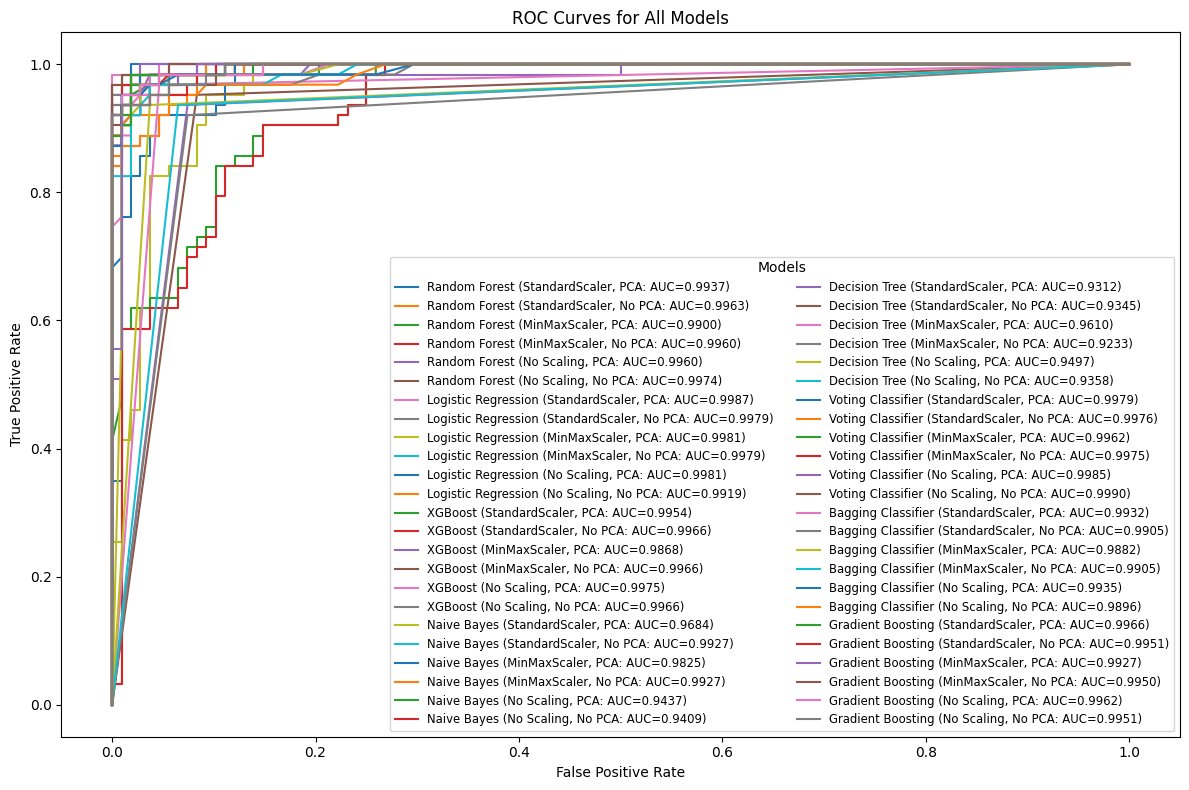

In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, BaggingClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA

data = pd.read_csv("data.csv")

X = data.drop(columns=['diagnosis', 'Unnamed: 32'], errors='ignore')
y = data['diagnosis']

imputer = SimpleImputer(strategy='mean')
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scalers = {
    'StandardScaler': StandardScaler(),
    'MinMaxScaler': MinMaxScaler(),
    'No Scaling': None
}

models = {
    'Random Forest': RandomForestClassifier(),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'XGBoost': XGBClassifier(eval_metric='logloss'),
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(),
    'Voting Classifier': VotingClassifier(
        estimators=[
            ('rf', RandomForestClassifier()),
            ('lr', LogisticRegression(max_iter=1000)),
            ('svc', SVC(probability=True))
        ], voting='soft'),
    'Bagging Classifier': BaggingClassifier(n_estimators=50),
    'Gradient Boosting': GradientBoostingClassifier()
}

results_experiment = {}
roc_data = []

def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, 'predict_proba') else y_pred

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, pos_label=1)
    recall = recall_score(y_test, y_pred, pos_label=1)
    f1 = f1_score(y_test, y_pred, pos_label=1)
    roc_auc = roc_auc_score(y_test, y_pred_prob) if hasattr(model, 'predict_proba') else None
    conf_matrix = confusion_matrix(y_test, y_pred)

    return accuracy, precision, recall, f1, roc_auc, conf_matrix, y_pred_prob

for model_name, model in models.items():
    for scaling_name, scaler in scalers.items():
        for apply_pca in [True, False]:
            pca_suffix = "with PCA" if apply_pca else "without PCA"
            print(f"\nEvaluating {model_name} with {scaling_name} scaling {pca_suffix}")

            if scaler:
                X_train_scaled = scaler.fit_transform(X_train)
                X_test_scaled = scaler.transform(X_test)
            else:
                X_train_scaled = X_train
                X_test_scaled = X_test
            if apply_pca:
                pca = PCA(n_components=min(X_train_scaled.shape[1], 10))
                X_train_scaled = pca.fit_transform(X_train_scaled)
                X_test_scaled = pca.transform(X_test_scaled)

            acc, prec, rec, f1, auc, cm, y_pred_prob = evaluate_model(model, X_train_scaled, X_test_scaled, y_train, y_test)


            if auc is not None:
                fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
                roc_data.append({
                    'Model': model_name,
                    'Scaling': scaling_name,
                    'PCA': apply_pca,
                    'FPR': fpr,
                    'TPR': tpr,
                    'AUC': auc
                })


            temp_df = pd.DataFrame([{"Model": model_name, "Scaling": scaling_name, "PCA": apply_pca,
                                     "Accuracy": acc, "Precision": prec, "Recall": rec,
                                     "F1 Score": f1, "ROC AUC": auc}],
                                   columns=["Model", "Scaling", "PCA", "Accuracy", "Precision", "Recall", "F1 Score", "ROC AUC"])

            if model_name not in results_experiment:
                results_experiment[model_name] = []
            results_experiment[model_name].append(temp_df)


result_df = pd.concat([pd.concat(results) for results in results_experiment.values()], ignore_index=True)
print(result_df)
best_model = result_df.loc[result_df['ROC AUC'].idxmax()]
print("\nBest Model Based on ROC AUC:")
print(best_model)

plt.figure(figsize=(12, 8))
for data in roc_data:
    label = f"{data['Model']} ({data['Scaling']}, {'PCA' if data['PCA'] else 'No PCA'}: AUC={data['AUC']:.4f})"
    plt.plot(data['FPR'], data['TPR'], label=label)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for All Models')
plt.legend(loc="lower right", fontsize='small', title="Models", ncol=2)
plt.tight_layout()
plt.show()


# Inference
### Evaluation of Models with Different Scaling and PCA Configurations

The table below summarizes the performance of various models across different scaling and PCA configurations:

| **Model**             | **Scaling**         | **PCA**  | **Accuracy** | **Precision** | **Recall** | **F1 Score** | **ROC AUC** |
|-----------------------|---------------------|----------|--------------|---------------|------------|--------------|-------------|
| Random Forest         | StandardScaler      | True     | 0.947368     | 0.921875      | 0.936508   | 0.929134     | 0.990667    |
| Random Forest         | StandardScaler      | False    | 0.970760     | 0.983333      | 0.936508   | 0.959350     | 0.995150    |
| Random Forest         | MinMaxScaler        | True     | 0.976608     | 0.983607      | 0.952381   | 0.967742     | 0.991843    |
| Random Forest         | MinMaxScaler        | False    | 0.964912     | 0.967213      | 0.936508   | 0.951613     | 0.995150    |
| Random Forest         | No Scaling          | True     | 0.970760     | 0.983333      | 0.936508   | 0.959350     | 0.994342    |
| Random Forest         | No Scaling          | False    | 0.970760     | 0.967742      | 0.952381   | 0.960000     | 0.995150    |
| Logistic Regression   | StandardScaler      | True     | 0.988304     | 0.984127      | 0.984127   | 0.984127     | 0.998677    |
| Logistic Regression   | StandardScaler      | False    | 0.982456     | 0.968750      | 0.984127   | 0.976378     | 0.997942    |
| Logistic Regression   | MinMaxScaler        | True     | 0.964912     | 0.983051      | 0.920635   | 0.950820     | 0.998089    |
| Logistic Regression   | MinMaxScaler        | False    | 0.964912     | 0.983051      | 0.920635   | 0.950820     | 0.997942    |
| Logistic Regression   | No Scaling          | True     | 0.970760     | 0.967742      | 0.952381   | 0.960000     | 0.998089    |
| Logistic Regression   | No Scaling          | False    | 0.959064     | 0.982759      | 0.904762   | 0.942149     | 0.991917    |
| XGBoost               | StandardScaler      | True     | 0.976608     | 0.968254      | 0.968254   | 0.968254     | 0.995444    |
| XGBoost               | StandardScaler      | False    | 0.970760     | 0.953125      | 0.968254   | 0.960630     | 0.996620    |
| XGBoost               | MinMaxScaler        | True     | 0.970760     | 0.953125      | 0.968254   | 0.960630     | 0.986772    |
| XGBoost               | MinMaxScaler        | False    | 0.970760     | 0.953125      | 0.968254   | 0.960630     | 0.996620    |
| XGBoost               | No Scaling          | True     | 0.964912     | 0.952381      | 0.952381   | 0.952381     | 0.997501    |
| XGBoost               | No Scaling          | False    | 0.970760     | 0.953125      | 0.968254   | 0.960630     | 0.996620    |
| Naive Bayes           | StandardScaler      | True     | 0.900585     | 0.883333      | 0.841270   | 0.861789     | 0.968401    |
| Naive Bayes           | StandardScaler      | False    | 0.935673     | 0.919355      | 0.904762   | 0.912000     | 0.992651    |
| Naive Bayes           | MinMaxScaler        | True     | 0.929825     | 0.918033      | 0.888889   | 0.903226     | 0.982510    |
| Naive Bayes           | MinMaxScaler        | False    | 0.935673     | 0.919355      | 0.904762   | 0.912000     | 0.992651    |
| Naive Bayes           | No Scaling          | True     | 0.637427     | 0.666667      | 0.031746   | 0.060606     | 0.943710    |
| Naive Bayes           | No Scaling          | False    | 0.637427     | 0.666667      | 0.031746   | 0.060606     | 0.940917    |
| Decision Tree         | StandardScaler      | True     | 0.929825     | 0.880597      | 0.936508   | 0.907692     | 0.931217    |
| Decision Tree         | StandardScaler      | False    | 0.935673     | 0.882353      | 0.952381   | 0.916031     | 0.939153    |
| Decision Tree         | MinMaxScaler        | True     | 0.953216     | 0.923077      | 0.952381   | 0.937500     | 0.953042    |
| Decision Tree         | MinMaxScaler        | False    | 0.935673     | 0.882353      | 0.952381   | 0.916031     | 0.939153    |
| Decision Tree         | No Scaling          | True     | 0.953216     | 0.936508      | 0.936508   | 0.936508     | 0.949735    |
| Decision Tree         | No Scaling          | False    | 0.935673     | 0.882353      | 0.952381   | 0.916031     | 0.939153    |
| Voting Classifier     | StandardScaler      | True     | 0.970760     | 0.953125      | 0.968254   | 0.960630     | 0.998089    |
| Voting Classifier     | StandardScaler      | False    | 0.976608     | 0.968254      | 0.968254   | 0.968254     | 0.997354    |
| Voting Classifier     | MinMaxScaler        | True     | 0.976608     | 0.983607      | 0.952381   | 0.967742     | 0.996473    |
| Voting Classifier     | MinMaxScaler        | False    | 0.982456     | 0.983871      | 0.968254   | 0.976000     | 0.997648    |
| Voting Classifier     | No Scaling          | True     | 0.970760     | 0.983333      | 0.936508   | 0.959350     | 0.998530    |
| Voting Classifier     | No Scaling          | False    | 0.976608     | 1.000000      | 0.936508   | 0.967213     | 0.998971    |
| Bagging Classifier    | StandardScaler      | True     | 0.959064     | 0.937500      | 0.952381   | 0.944882     | 0.993974    |
| Bagging Classifier    | StandardScaler      | False    | 0.959064     | 0.951613      | 0.936508   | 0.944000     | 0.988463    |
| Bagging Classifier    | MinMaxScaler        | True     | 0.953216     | 0.936508      | 0.936508   | 0.944000     | 0.987875    |
| Bagging Classifier    | MinMaxScaler        | False    | 0.959064     | 0.951613      | 0.936508   | 0.944000     | 0.989712    |
| Bagging Classifier    | No Scaling          | True     | 0.982456     | 0.983871      | 0.968254   | 0.976000     | 0.994195    |
| Bagging Classifier    | No Scaling          | False    | 0.959064     | 0.951613      | 0.936508   | 0.944000     | 0.990079    |
| Gradient Boosting     | StandardScaler      | True     | 0.976608     | 0.968254      | 0.968254   | 0.968254     | 0.996620    |
| Gradient Boosting     | StandardScaler      | False    | 0.953216     | 0.936508      | 0.936508   | 0.936508     | 0.995297    |
| Gradient Boosting     | MinMaxScaler        | True     | 0.959064     | 0.951613      | 0.936508   | 0.944000     | 0.992504    |
| Gradient Boosting     | MinMaxScaler        | False    | 0.959064     | 0.937500      | 0.952381   | 0.944882     | 0.995150    |
| Gradient Boosting     | No Scaling          | True     | 0.976608     | 0.983607      | 0.952381   | 0.967742     | 0.996326    |
| Gradient Boosting     | No Scaling          | False    | 0.953216     | 0.936508      | 0.936508   | 0.936508     | 0.995150    |

---

### Best Model Based on ROC AUC:
**Model**: Voting Classifier  
**Scaling**: No Scaling  
**PCA**: False  
**Accuracy**: 0.976608  
**Precision**: 1.0  
**Recall**: 0.936508  
**F1 Score**: 0.967213  
**ROC AUC**: 0.998971
